In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="NwbVDBUU8k2x81jb7IzL")
project = rf.workspace("statelite").project("cyclone_detection-qwint")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cyclone_detection-2 in yolov8:: 100%|██████████| 1300/1300 [00:00<00:00, 5303.43it/s]


In [ ]:
!mkdir datasets
!mv cyclone_detection-2/ datasets/

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/datasets/cyclone_detection-2/data.yaml", epochs=250)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [ ]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/cyclone_detection-2/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
                   all         56         56      0.965      0.982      0.991       0.61
Speed: 3.3ms pre-process, 6.7ms inference, 0.0ms loss, 6.6ms post-process per image


In [ ]:
success = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

PyTorch: starting from runs/detect/train/weights/best.pt with output shape (1, 5, 8400) (6.0 MB)

ONNX: starting export with onnx 1.13.1...
ONNX: export success ✅ 0.7s, saved as runs/detect/train/weights/best.onnx (11.7 MB)

Export complete (0.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo task=detect mode=predict model=runs/detect/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=runs/detect/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app


============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([1, 6])
dtype: torch.float32
 + tensor([[551.00000, 538.00000, 783.00000, 759.00000,   0.81939,   0.00000]], device='cuda:0')]


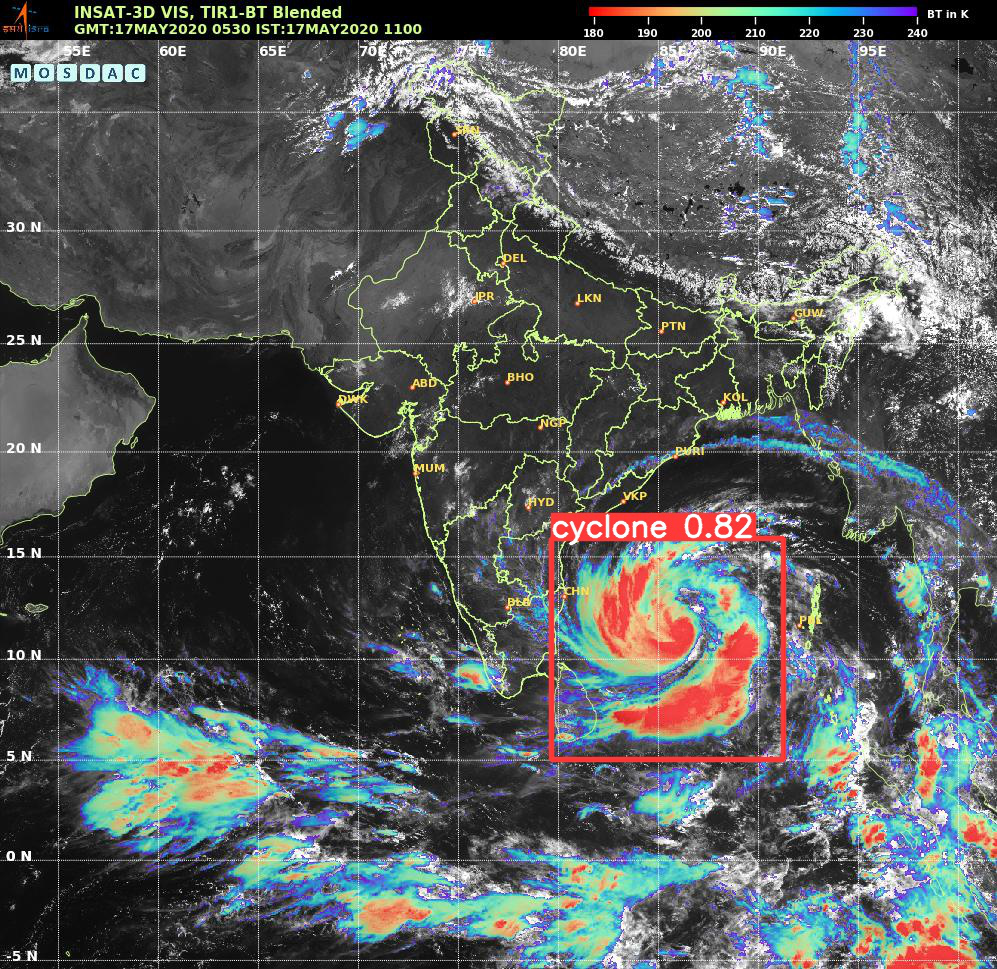

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2

# from PIL
im1 = Image.open("/content/17MAY2020-0530.jpg")
results = model.predict(source=im1, save=True)  # save plotted images
print(results)
display(Image.open('runs/detect/predict/image0.jpg'))